Linear Regression's purpose is to predict a continous value like house pricing or temperature
Loss function used: Mean Squared Error(MSE)

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
# Load California Housing dataset for linear regression
housing = fetch_california_housing(as_frame=True)
df: pd.DataFrame = housing.frame

# Separate features and target
X: pd.DataFrame = df.drop('MedHouseVal', axis=1)
y: pd.Series = df['MedHouseVal']

# Split into train and test sets
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler: StandardScaler = StandardScaler()
X_train_scaled: np.ndarray = scaler.fit_transform(X_train)
X_test_scaled: np.ndarray = scaler.transform(X_test)


In [21]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


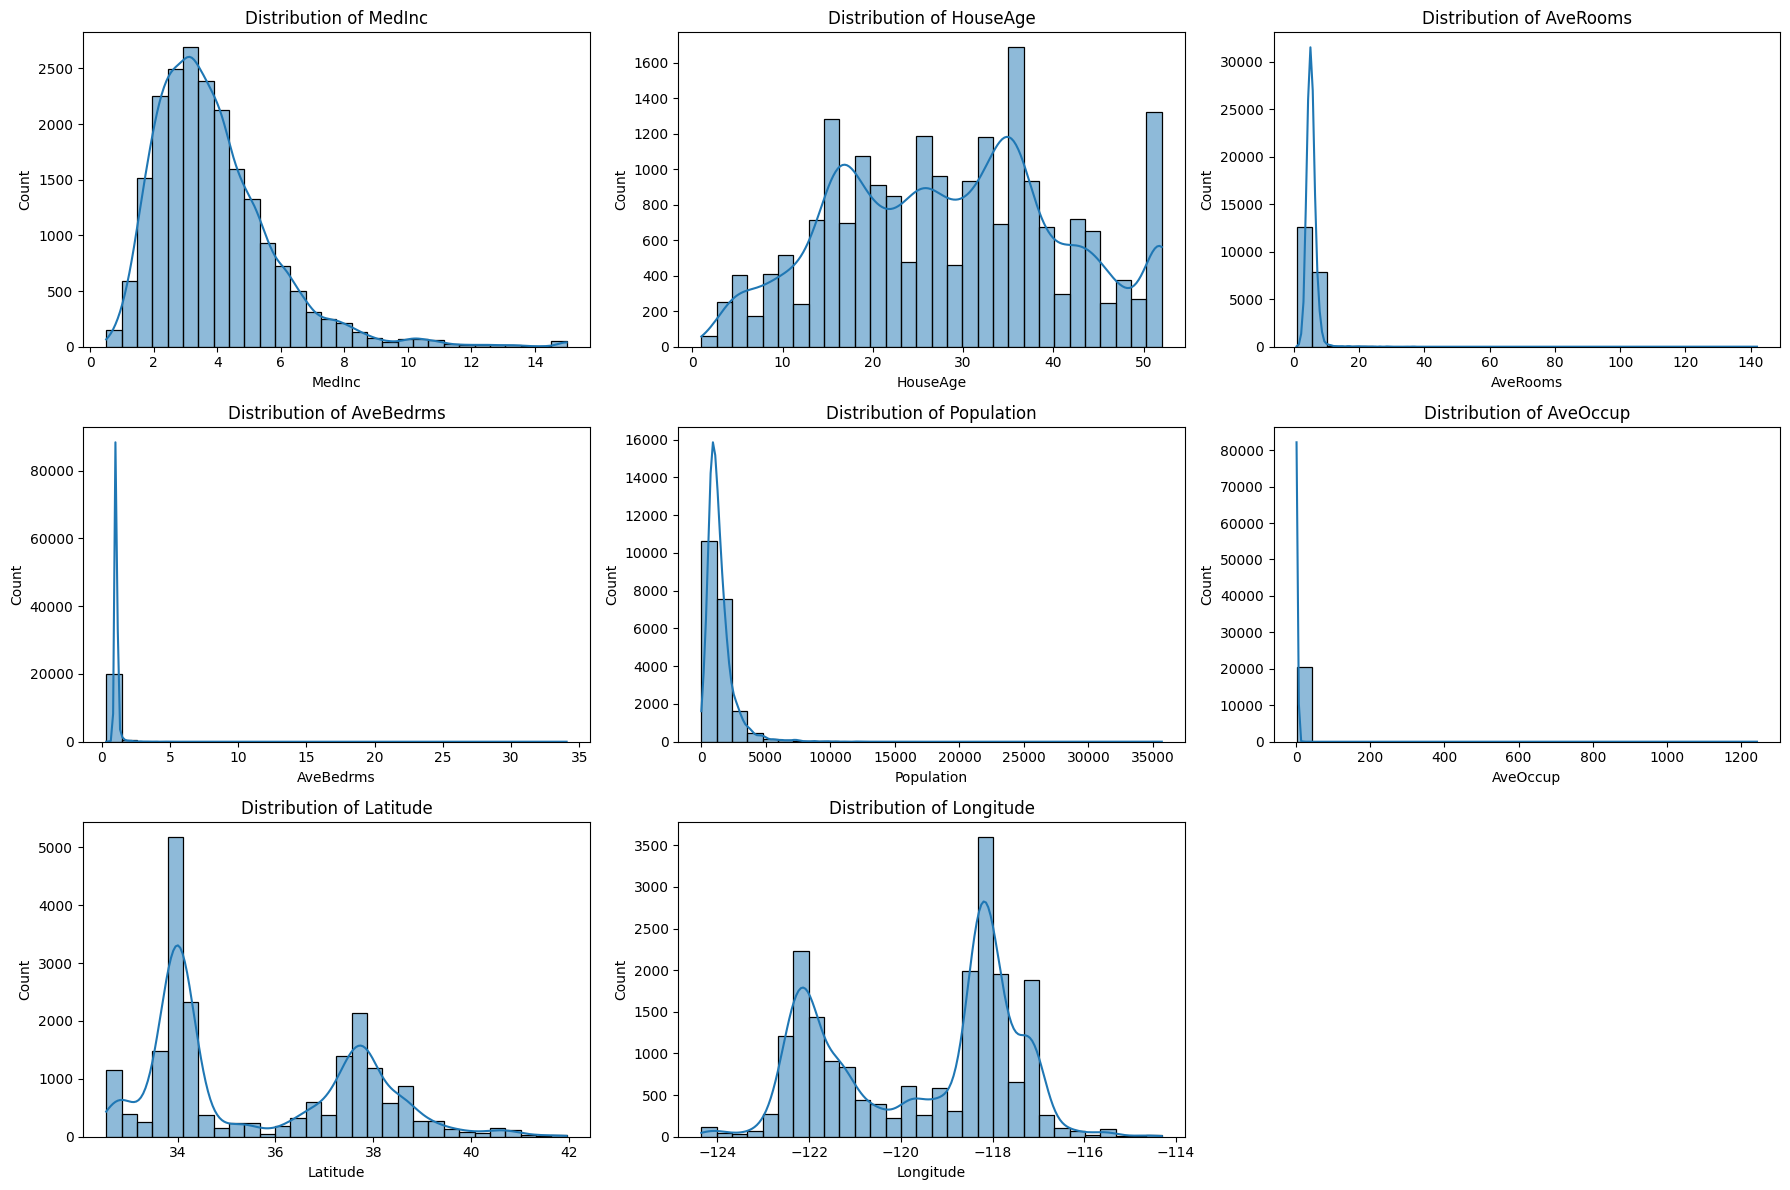

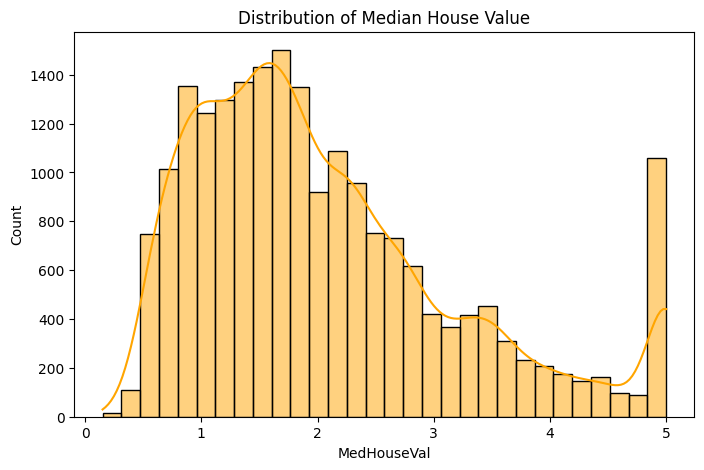

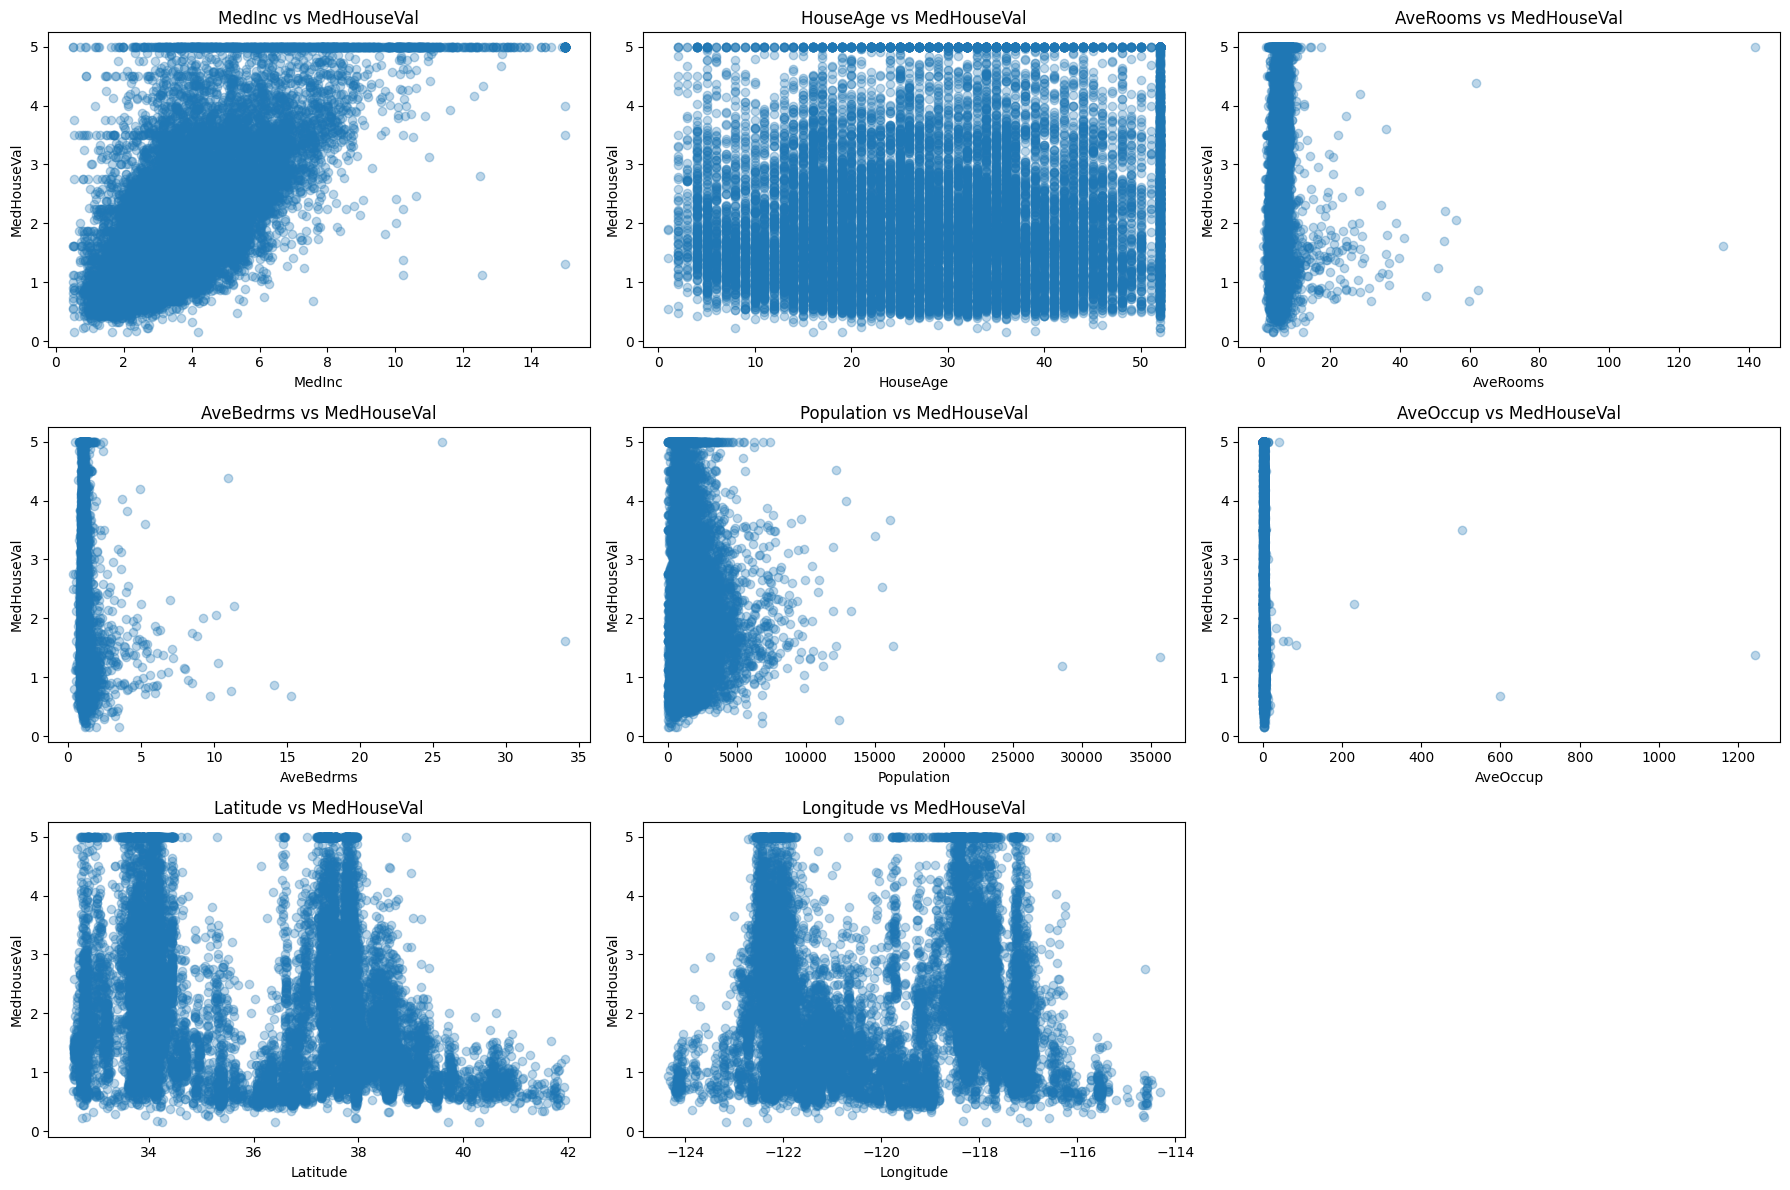

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions(df: pd.DataFrame) -> None:
    """Plots histograms for each feature in the DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing features and target.
    """
    df_features = df.drop('MedHouseVal', axis=1)
    num_features = df_features.shape[1]
    plt.figure(figsize=(18, 12))
    for idx, col in enumerate(df_features.columns):
        plt.subplot(3, 3, idx + 1)
        sns.histplot(df_features[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def plot_target_distribution(df: pd.DataFrame) -> None:
    """Plots the distribution of the target variable.

    Args:
        df (pd.DataFrame): The input DataFrame containing the target.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df['MedHouseVal'], kde=True, bins=30, color='orange')
    plt.title('Distribution of Median House Value')
    plt.xlabel('MedHouseVal')
    plt.ylabel('Count')
    plt.show()

def plot_feature_vs_target(df: pd.DataFrame) -> None:
    """Plots scatter plots of each feature against the target variable.

    Args:
        df (pd.DataFrame): The input DataFrame containing features and target.
    """
    df_features = df.drop('MedHouseVal', axis=1)
    num_features = df_features.shape[1]
    plt.figure(figsize=(18, 12))
    for idx, col in enumerate(df_features.columns):
        plt.subplot(3, 3, idx + 1)
        plt.scatter(df_features[col], df['MedHouseVal'], alpha=0.3)
        plt.title(f'{col} vs MedHouseVal')
        plt.xlabel(col)
        plt.ylabel('MedHouseVal')
    plt.tight_layout()
    plt.show()

# Plot feature distributions
plot_feature_distributions(df)

# Plot target distribution
plot_target_distribution(df)

# Plot feature vs target scatter plots
plot_feature_vs_target(df)


In [42]:
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(mse)


0.5343332879041867
